In [3]:
import pandas as pd
import numpy as np
from v2_utils.generate_prototype import prototype_generation
import matplotlib.pyplot as plt

# Mock Data for Testing

In [ ]:
# We generate mock data for showing the process of generating prototypes, this mock data is mock_data_concat
# The mock_data_concat is used for represent the combined data(simulated and real-scenario data) we used in our paper

### Got the Protypes from data_concat(origianl+pseudo)

In [4]:
mock_data_concat=pd.read_csv('./mock_data/mock_data_concat.csv')  

In [5]:
# We select the data with the outcome is 0:expired or 2:survived, and we use this data to generate prototypes
mock_data_concat_outcome_0_2 = mock_data_concat[mock_data_concat['outcome'].isin([0, 2])]


In [6]:
mock_data_concat_outcome_0_2.reset_index(drop=True, inplace=True)
mock_data_concat_outcome_0_2_X=mock_data_concat_outcome_0_2.drop(columns=['outcome'])

In [7]:
mock_data_concat_outcome_0_2_X

,lat,lon,code_cpr_type,code_etiology,code_gender,code_race,code_location_type,code_acuity,code_witness,code_cpr_used,code_who_cpr,code_aed_used,code_age,code_duration
0,32.424390,-84.364782,5.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0
1,33.172182,-81.807331,8.0,5.0,1.0,4.0,13.0,0.0,2.0,0.0,1.0,0.0,1.0,3.0
2,34.841119,-83.053377,2.0,3.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0
3,32.184135,-84.311916,1.0,8.0,0.0,2.0,1.0,1.0,3.0,0.0,3.0,0.0,3.0,1.0
4,33.559521,-84.084964,9.0,2.0,1.0,2.0,14.0,2.0,3.0,0.0,2.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,30.906339,-81.904760,10.0,7.0,0.0,1.0,8.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0
130,33.407078,-81.929253,5.0,2.0,0.0,6.0,2.0,3.0,1.0,1.0,0.0,0.0,2.0,2.0
131,34.600271,-84.715623,13.0,4.0,0.0,3.0,6.0,3.0,3.0,1.0,3.0,1.0,0.0,2.0
132,33.066607,-81.534480,6.0,2.0,0.0,3.0,6.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0


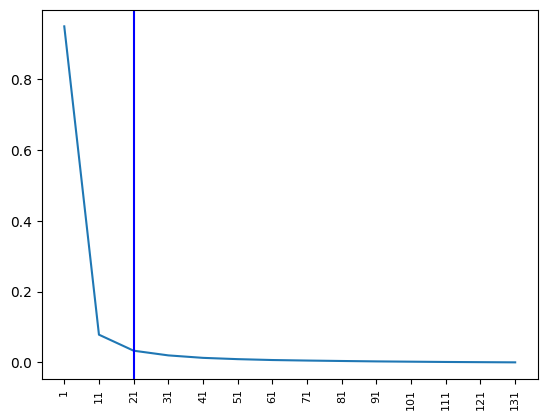

In [9]:
# confirm the optimal number of prototype
proto_generate=prototype_generation()                            
proto_generate.load_data(df_all=mock_data_concat_outcome_0_2_X)
arr_trend_mmd_lst=proto_generate.generate_prototypes(num_prototypes=[i for i in range(1, int(len(mock_data_concat_outcome_0_2_X)), 10)], type_kernel='local')
# confirm the optimal number of prototype
plt.plot(arr_trend_mmd_lst[0],arr_trend_mmd_lst[1])
plt.xticks(np.arange(min(arr_trend_mmd_lst[0]), max(arr_trend_mmd_lst[0])+1, 10), fontsize=8, rotation=90)
plt.axvline(x =21, color = 'b', label = 'axvline - full height')
plt.show()

In [10]:
# used the optimized number 21  to generate the prototype
proto_generate=prototype_generation()                            
proto_generate.load_data(df_all=mock_data_concat_outcome_0_2_X)
arr_indices=proto_generate.generate_prototype_with_optimal_number(opt_num_prototype=21, type_kernel='local')
df_prototypes=mock_data_concat_outcome_0_2.loc[arr_indices]

In [11]:
df_prototypes

,lat,lon,code_cpr_type,code_etiology,code_gender,code_race,code_location_type,code_acuity,code_witness,code_cpr_used,code_who_cpr,code_aed_used,code_age,code_duration,outcome
102,32.819351,-85.479402,12.0,5.0,1.0,6.0,6.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0
58,32.717062,-80.875752,8.0,3.0,0.0,2.0,12.0,1.0,2.0,1.0,0.0,1.0,1.0,2.0,2.0
115,30.775275,-83.581435,5.0,3.0,0.0,4.0,10.0,0.0,2.0,1.0,2.0,1.0,2.0,3.0,0.0
87,31.622045,-83.729293,5.0,7.0,0.0,0.0,5.0,2.0,2.0,0.0,1.0,1.0,2.0,0.0,2.0
13,32.052605,-83.031092,8.0,6.0,1.0,4.0,13.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,0.0
49,33.724435,-81.198973,3.0,5.0,0.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
109,32.118883,-83.899627,8.0,4.0,1.0,3.0,8.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0
97,33.612382,-85.116407,9.0,8.0,1.0,6.0,12.0,0.0,0.0,1.0,2.0,1.0,3.0,2.0,2.0
128,33.643567,-82.914010,14.0,5.0,1.0,5.0,0.0,2.0,3.0,1.0,2.0,0.0,0.0,1.0,2.0
65,31.823482,-84.180639,12.0,3.0,0.0,1.0,5.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0
